In [1]:
import matplotlib.pyplot as plt
import json
from dataset import *
from PIL import Image
import numpy as np


%matplotlib inline

In [2]:
data_set = TinyImageNetDataset("../data/tiny-imagenet-200/", train=False)

class_labels = data_set.classes_labels

with open("demo_info.json", "r") as f:
    demo_info_dict = json.load(f)


Finished getting the classes labels
10000


dict_keys(['bot_labels', 'bot_distance', 'image_path', 'top_labels', 'top_image_paths', 'bot_image_paths', 'top_distance'])
dict_keys(['n03444034', 'n04399382', 'n02808440', 'n04067472', 'n04070727'])


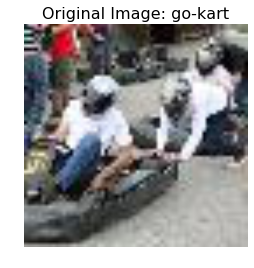

In [3]:
print(demo_info_dict['n04067472'].keys())
print(demo_info_dict.keys())
def plotsinglegraph(dic, label):
    img = Image.open(dic["image_path"])
    
    plt.imshow(np.asarray(img))
    plt.title("Original Image: " + class_labels[label].split(",")[0], fontsize=16)
    plt.axis('off')

    plt.savefig("./img/"+label+"-orginal.png")
    plt.show()
    
plotsinglegraph(demo_info_dict['n03444034'],'n03444034')

In [4]:
def plotmultigraphs(dic, label, title, attr):
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8))
    fig.suptitle(title, fontsize=24)
    for i in range(2):
        for j in range(5):
            idx = i*5+j
            img = Image.open(dic[attr+"_image_paths"][idx])
            rgbimg = Image.new("RGB", img.size)
            rgbimg.paste(img)
            axes[i,j].imshow(img)
            
            img_label = class_labels[dic[attr+"_labels"][idx]].split(",")[0]
            img_dist = "%.3f"%dic[attr+"_distance"][idx]
            axes[i,j].set_title(img_label+", dist: "+img_dist, fontsize=16)
            axes[i,j].axis('tight')
            axes[i,j].axis('off')
    
    plt.savefig("./img/"+label+"-"+attr+".png")
    plt.show()

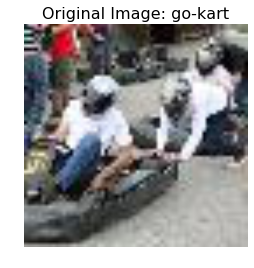

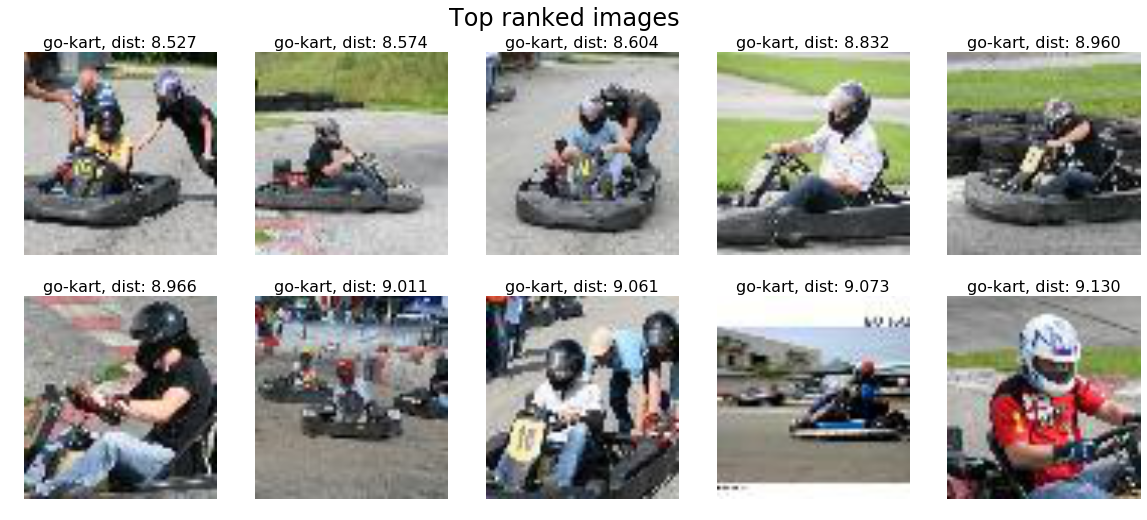

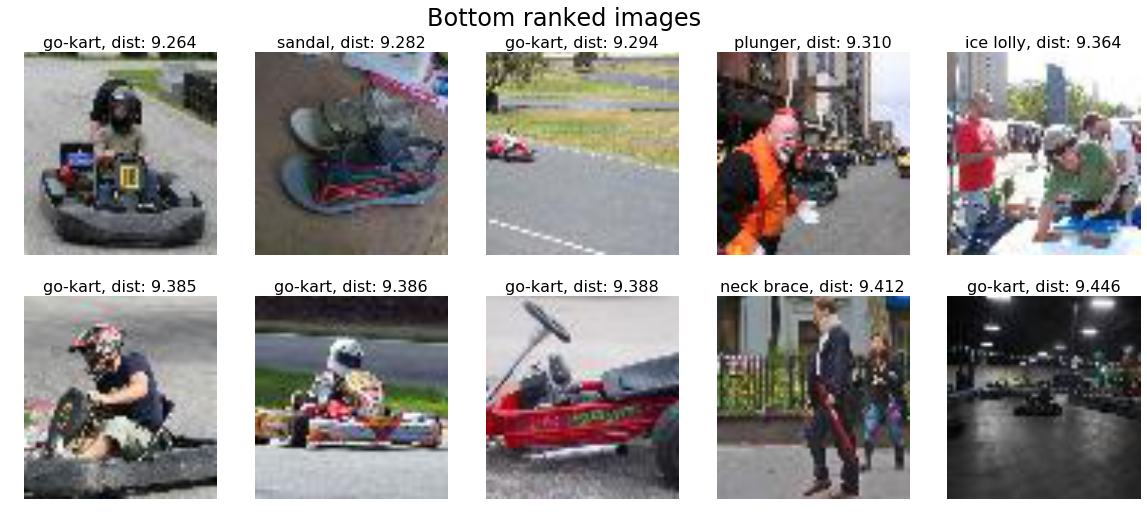

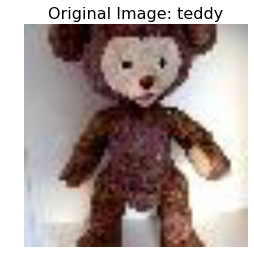

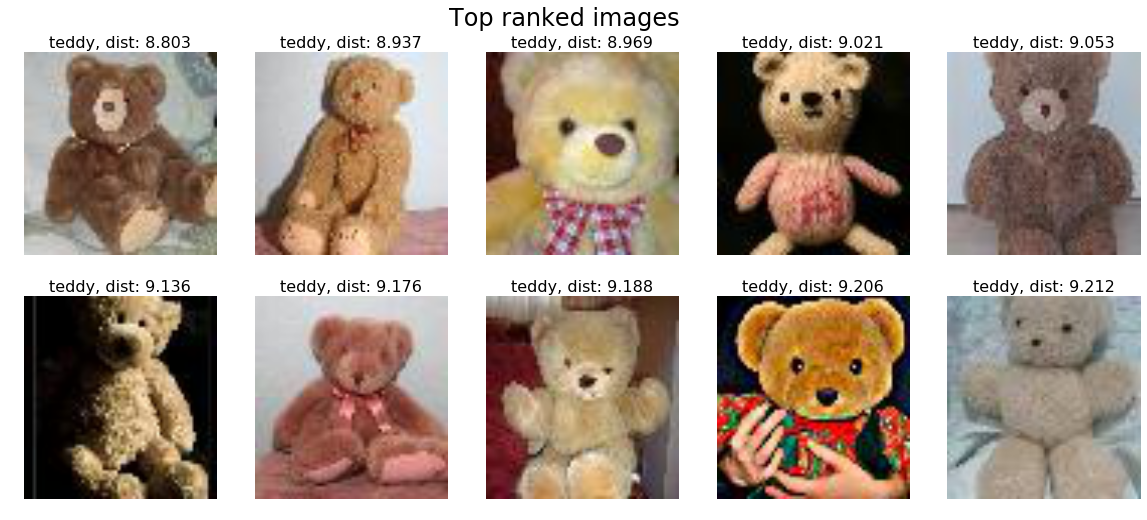

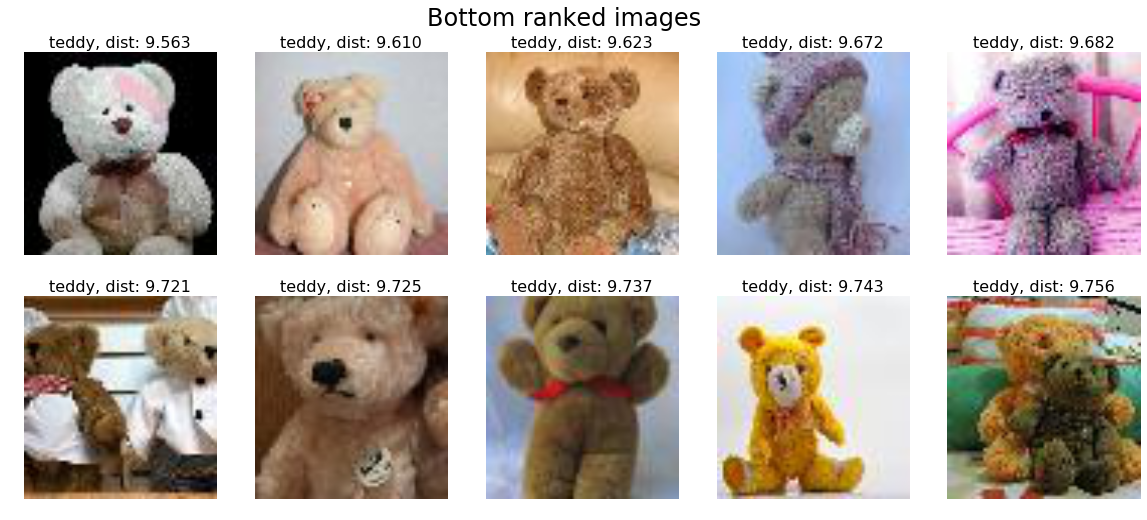

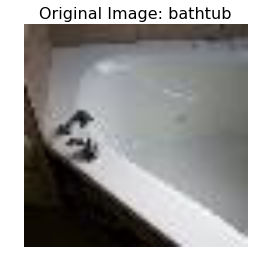

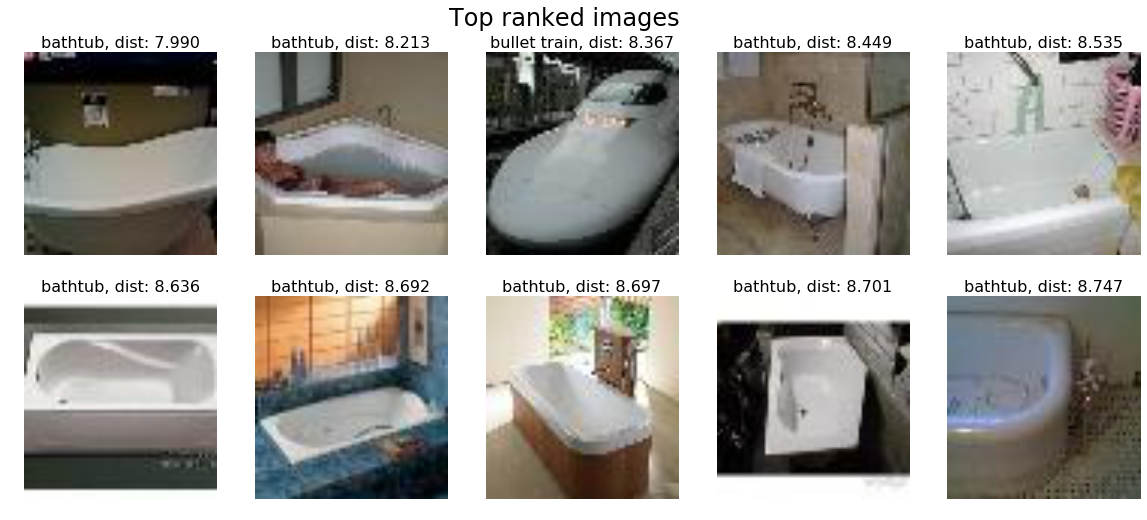

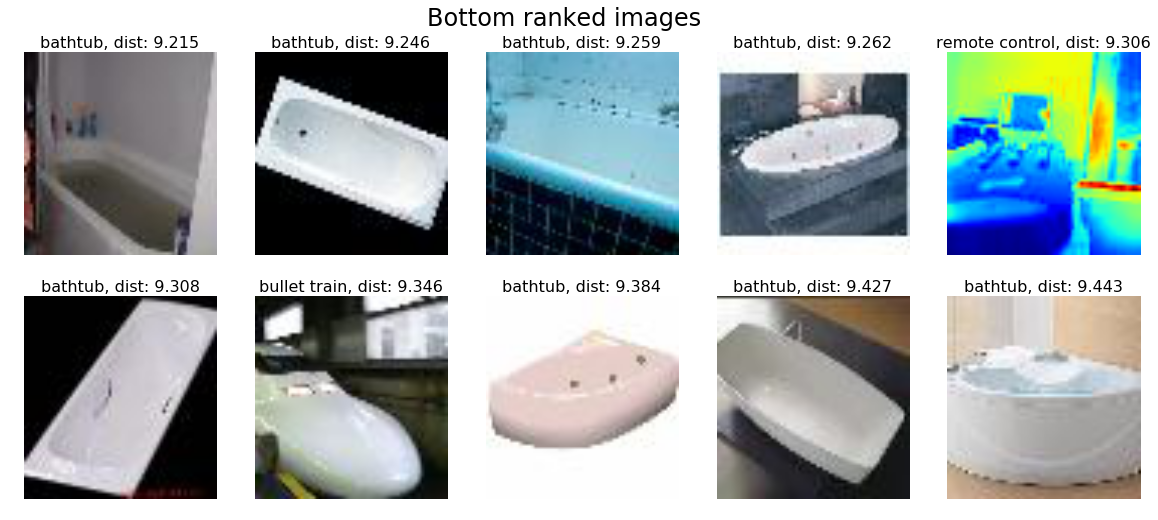

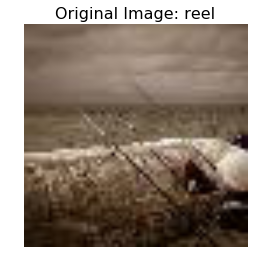

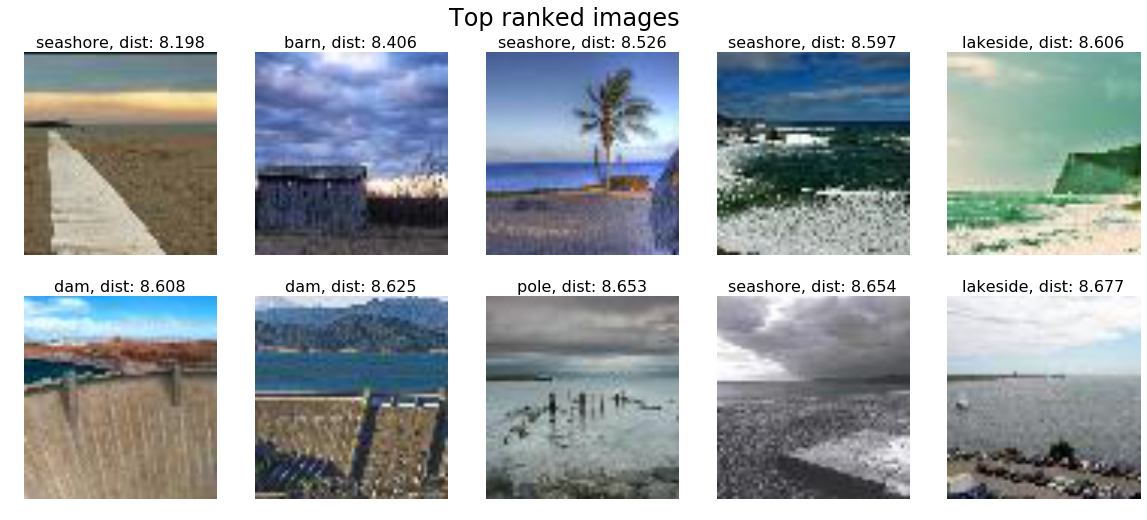

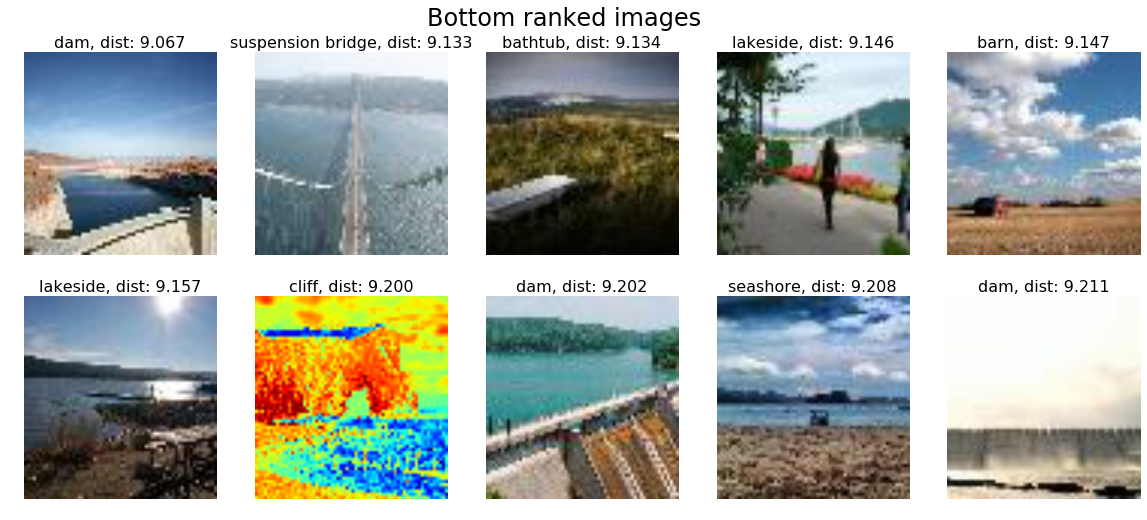

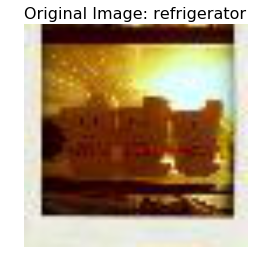

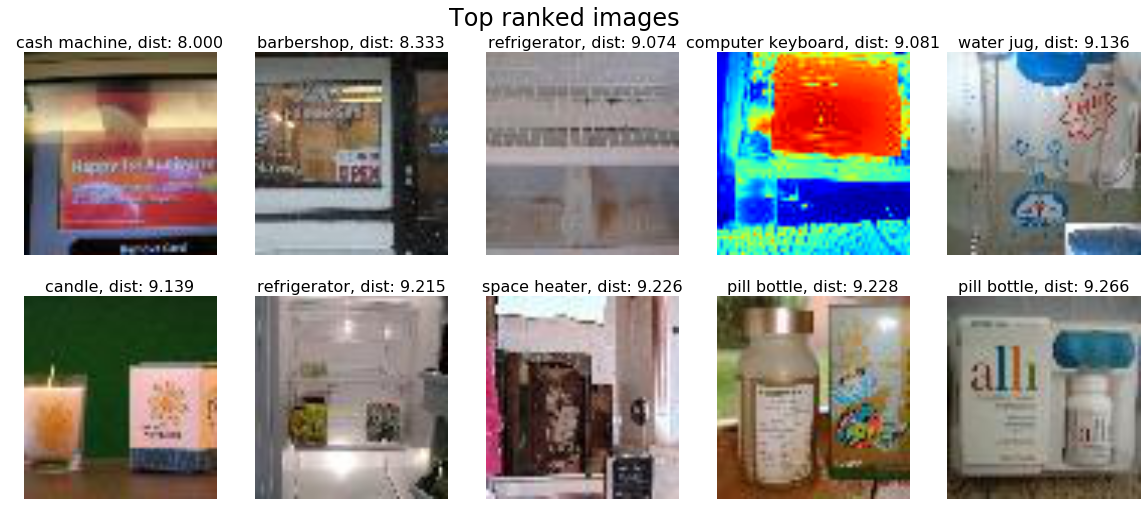

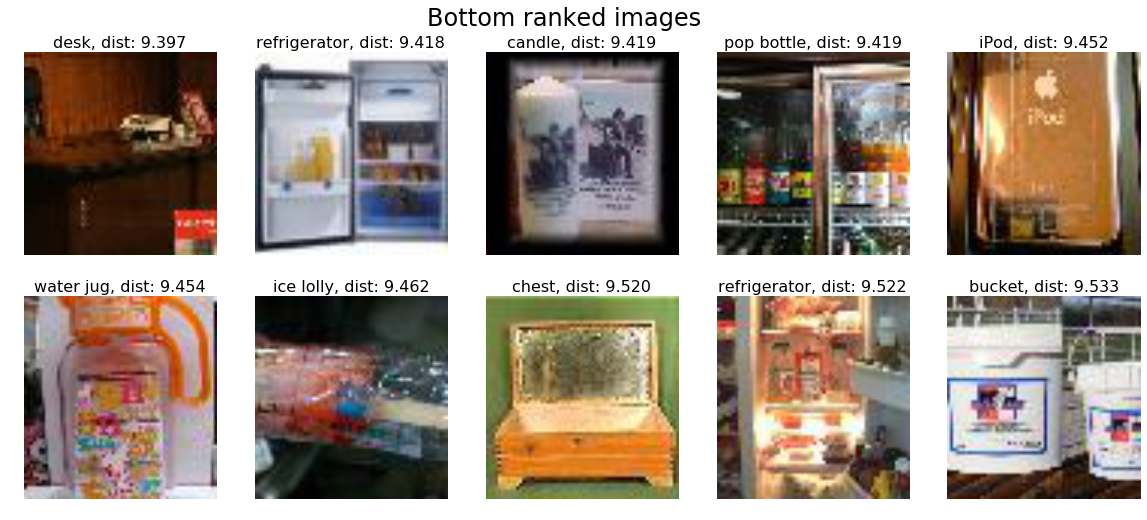

In [5]:

for key in list(demo_info_dict.keys()):
    plotsinglegraph(demo_info_dict[key], key)
    plotmultigraphs(demo_info_dict[key], key, "Top ranked images", 'top')
    plotmultigraphs(demo_info_dict[key], key, "Bottom ranked images", 'bot')

In [6]:
import json
with open("./src/training_loss_15.json", "r") as f:
    training_loss = json.load(f)

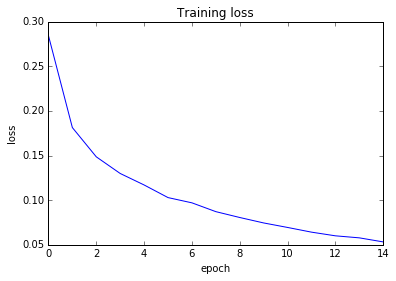

In [10]:
plt.plot(training_loss)
plt.title("Training loss")
plt.xlabel("epoch")
plt.ylabel("loss")